<a href="https://colab.research.google.com/github/migoamr/Postwork/blob/main/Synthetic_Financial_Transaction_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.3 MB/s eta 0:00:00


Generating synthetic financial transaction data...
Dataset generated with 1000 records

=== SAMPLE RECORDS ===
First 10 transactions:


,transaction_id,transaction_amount,transaction_type,timestamp,year,month,day,hour,day_of_week,is_weekend
0,TXN000001,126.57,WITHDRAWAL,2023-11-24 04:03:12,2023,11,24,4,4,0
1,TXN000002,2237.07,DEPOSIT,2023-02-22 19:51:22,2023,2,22,19,2,0
2,TXN000003,2166.86,DEPOSIT,2023-08-05 01:09:25,2023,8,5,1,5,1
3,TXN000004,753.87,PAYMENT,2023-01-14 20:26:03,2023,1,14,20,5,1
4,TXN000005,1089.09,DEPOSIT,2023-11-29 19:50:26,2023,11,29,19,2,0
5,TXN000006,1138.73,DEPOSIT,2023-08-18 21:27:16,2023,8,18,21,4,0
6,TXN000007,53.51,WITHDRAWAL,2023-06-24 10:07:01,2023,6,24,10,5,1
7,TXN000008,374.04,WITHDRAWAL,2023-06-22 03:43:16,2023,6,22,3,3,0
8,TXN000009,396.02,PAYMENT,2023-11-06 09:37:51,2023,11,6,9,0,0
9,TXN000010,170.91,WITHDRAWAL,2023-08-24 19:31:24,2023,8,24,19,3,0



=== DATA VALIDATION RESULTS ===
Total transactions: 1000
Date range: 2023-01-01 05:43:56 to 2023-12-30 05:38:10
Total amount transacted: $896,728.09

Transaction Type Distribution:
  PAYMENT: 36.3% (expected: 35.0%)
  DEPOSIT: 25.5% (expected: 25.0%)
  WITHDRAWAL: 18.4% (expected: 20.0%)
  TRANSFER: 14.7% (expected: 15.0%)
  REFUND: 5.1% (expected: 5.0%)

Amount Statistics by Transaction Type:
  DEPOSIT:
    Count: 255
    Mean: $2049.52
    Median: $1639.47
    Std: $1369.35
  WITHDRAWAL:
    Count: 184
    Mean: $268.35
    Median: $269.03
    Std: $113.02
  PAYMENT:
    Count: 363
    Mean: $491.14
    Median: $494.80
    Std: $241.58
  TRANSFER:
    Count: 147
    Mean: $902.92
    Median: $792.58
    Std: $557.75
  REFUND:
    Count: 51
    Mean: $268.87
    Median: $278.13
    Std: $107.90

Time Pattern Analysis:
  Weekend transactions: 16.7%
  Peak transaction hours:
    13:00 - 10.8%
    10:00 - 8.4%
    17:00 - 8.2%

=== DATA VISUALIZATION ===


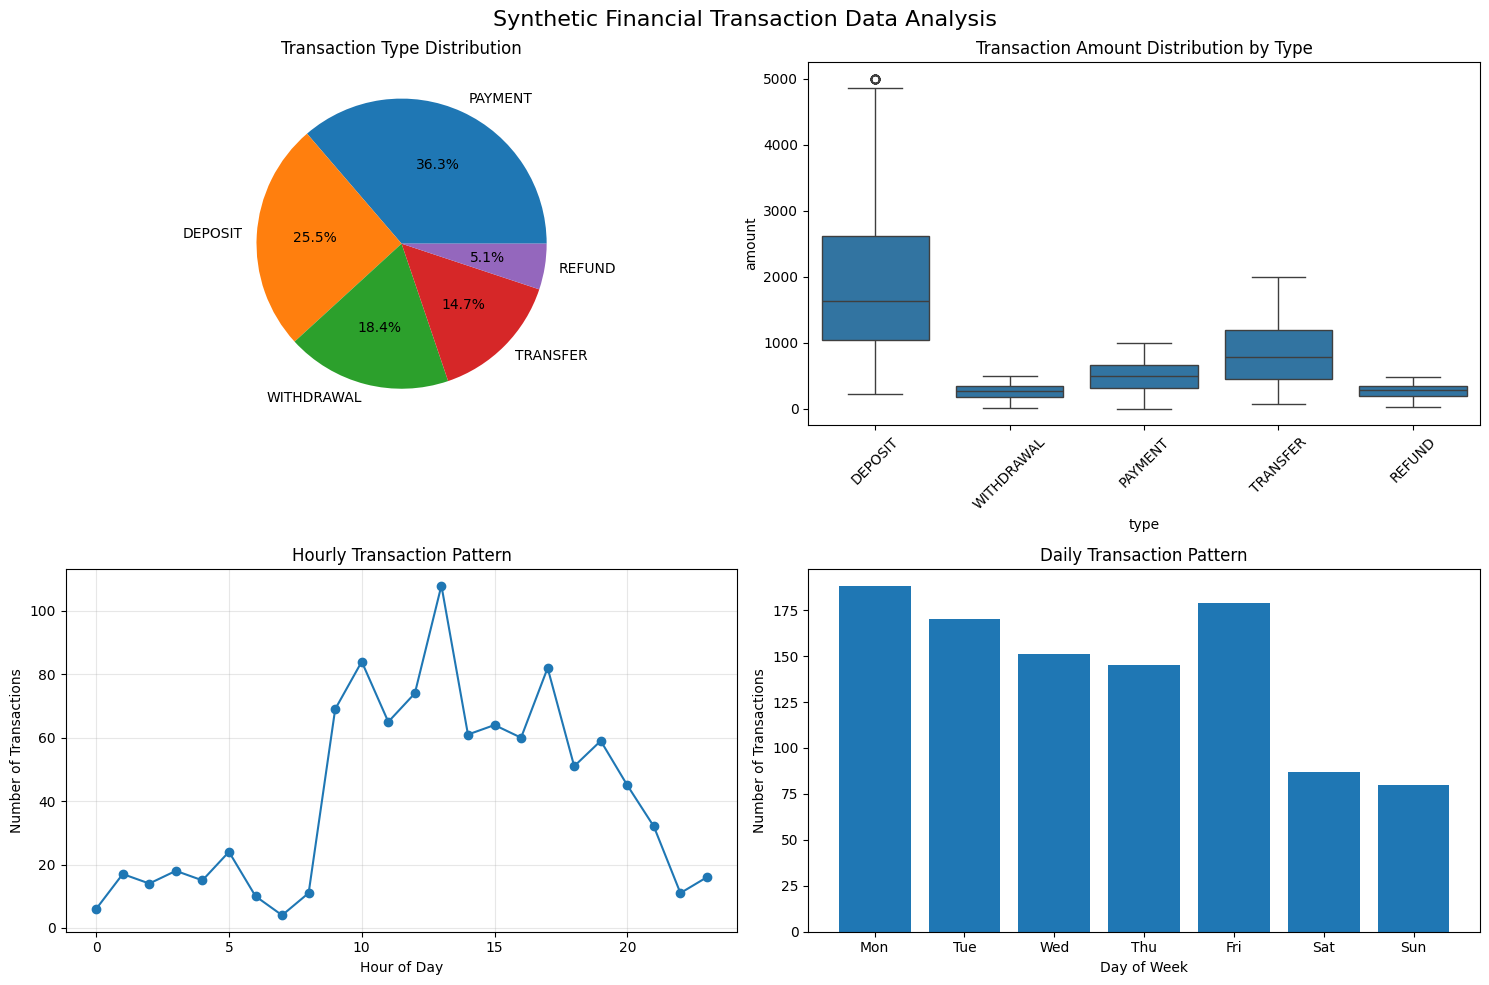


Dataset saved to: synthetic_transactions_20250926_012851.csv

=== SUMMARY STATISTICS ===
       transaction_amount                   timestamp    year        month  \
count          1000.00000                        1000  1000.0  1000.000000   
mean            896.72809  2023-07-07 21:13:43.492000  2023.0     6.695000   
min               5.00000         2023-01-01 05:43:56  2023.0     1.000000   
25%             299.80750  2023-04-10 15:54:45.500000  2023.0     4.000000   
50%             526.25000         2023-07-11 11:34:49  2023.0     7.000000   
75%            1000.00000         2023-10-06 13:32:42  2023.0    10.000000   
max            5000.00000         2023-12-30 05:38:10  2023.0    12.000000   
std            1018.89248                         NaN     0.0     3.372143   

              day         hour  day_of_week   is_weekend  
count  1000.00000  1000.000000  1000.000000  1000.000000  
mean     15.92800    13.312000     2.538000     0.167000  
min       1.00000     0.000000

In [3]:
# synthetic_financial_data.ipynb

# Description: This notebook generates synthetic financial transaction data
# for behavioral analysis and testing purposes while maintaining data privacy.

# Import required libraries
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Faker for realistic data generation
fake = Faker()

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)
Faker.seed(42)

# Configuration parameters
NUM_RECORDS = 1000  # Number of transactions to generate
START_DATE = datetime(2023, 1, 1)
END_DATE = datetime(2023, 12, 31)

# Define transaction types with realistic probabilities
TRANSACTION_TYPES = {
    'DEPOSIT': 0.25,      # Salary, transfers in
    'WITHDRAWAL': 0.20,   # ATM withdrawals
    'PAYMENT': 0.35,      # Bill payments, purchases
    'TRANSFER': 0.15,     # Peer-to-peer transfers
    'REFUND': 0.05        # Purchase refunds
}

# Define amount ranges for each transaction type (in USD)
AMOUNT_RANGES = {
    'DEPOSIT': (100, 5000),
    'WITHDRAWAL': (20, 500),
    'PAYMENT': (5, 1000),
    'TRANSFER': (10, 2000),
    'REFUND': (5, 500)
}

# Define time patterns (higher activity during business hours and weekdays)
def get_time_pattern_weight(hour, day_of_week):
    """Generate weights for different times to create realistic patterns"""
    # Weekdays (0-4 = Monday-Friday) have higher activity
    if day_of_week < 5:  # Weekday
        if 9 <= hour <= 17:  # Business hours
            return 3.0
        elif 18 <= hour <= 21:  # Evening
            return 1.5
        else:  # Night
            return 0.5
    else:  # Weekend
        if 10 <= hour <= 20:  # Daytime weekend
            return 1.2
        else:  # Night weekend
            return 0.3

def generate_transaction_data(num_records):
    """Generate synthetic financial transaction data"""

    transactions = []

    for i in range(num_records):
        # Generate unique transaction ID
        transaction_id = f"TXN{str(i+1).zfill(6)}"

        # Select transaction type based on probabilities
        transaction_type = np.random.choice(
            list(TRANSACTION_TYPES.keys()),
            p=list(TRANSACTION_TYPES.values())
        )

        # Generate realistic amount based on transaction type
        min_amt, max_amt = AMOUNT_RANGES[transaction_type]

        # Create different distribution patterns for different types
        if transaction_type in ['DEPOSIT', 'TRANSFER']:
            # Right-skewed distribution (few large, many small)
            amount = np.random.lognormal(
                mean=np.log(min_amt + (max_amt - min_amt) / 3),
                sigma=0.8
            )
        else:
            # More normal distribution for payments/withdrawals
            amount = np.random.normal(
                loc=(min_amt + max_amt) / 2,
                scale=(max_amt - min_amt) / 4
            )

        # Ensure amount is within reasonable bounds
        amount = max(min_amt, min(max_amt, abs(amount)))
        amount = round(amount, 2)

        # Generate realistic timestamp with time patterns
        time_delta = END_DATE - START_DATE
        random_days = random.randint(0, time_delta.days)
        random_seconds = random.randint(0, 86400)  # Seconds in a day

        timestamp = START_DATE + timedelta(
            days=random_days,
            seconds=random_seconds
        )

        # Apply time pattern weighting (regenerate if outside desired patterns)
        hour = timestamp.hour
        day_of_week = timestamp.weekday()
        weight = get_time_pattern_weight(hour, day_of_week)

        # Use weighting to influence acceptance
        if random.random() > weight / 3.0:  # Normalize by max weight
            # Regenerate timestamp with better weighting
            for _ in range(10):  # Try up to 10 times
                random_days = random.randint(0, time_delta.days)
                random_seconds = random.randint(0, 86400)
                timestamp = START_DATE + timedelta(
                    days=random_days,
                    seconds=random_seconds
                )
                hour = timestamp.hour
                day_of_week = timestamp.weekday()
                weight = get_time_pattern_weight(hour, day_of_week)
                if random.random() <= weight / 3.0:
                    break

        # Create transaction record
        transaction = {
            'transaction_id': transaction_id,
            'transaction_amount': amount,
            'transaction_type': transaction_type,
            'timestamp': timestamp,
            'year': timestamp.year,
            'month': timestamp.month,
            'day': timestamp.day,
            'hour': timestamp.hour,
            'day_of_week': day_of_week,
            'is_weekend': 1 if day_of_week >= 5 else 0
        }

        transactions.append(transaction)

    return pd.DataFrame(transactions)

# Generate the dataset
print("Generating synthetic financial transaction data...")
df = generate_transaction_data(NUM_RECORDS)
print(f"Dataset generated with {len(df)} records")

# Data Validation and Analysis
def validate_data(df):
    """Validate the generated data for realistic patterns"""

    print("\n=== DATA VALIDATION RESULTS ===")

    # Basic information
    print(f"Total transactions: {len(df)}")
    print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
    print(f"Total amount transacted: ${df['transaction_amount'].sum():,.2f}")

    # Transaction type distribution
    print("\nTransaction Type Distribution:")
    type_dist = df['transaction_type'].value_counts(normalize=True)
    for ttype, proportion in type_dist.items():
        print(f"  {ttype}: {proportion:.1%} (expected: {TRANSACTION_TYPES[ttype]:.1%})")

    # Amount statistics by type
    print("\nAmount Statistics by Transaction Type:")
    for ttype in TRANSACTION_TYPES.keys():
        type_data = df[df['transaction_type'] == ttype]
        if len(type_data) > 0:
            print(f"  {ttype}:")
            print(f"    Count: {len(type_data)}")
            print(f"    Mean: ${type_data['transaction_amount'].mean():.2f}")
            print(f"    Median: ${type_data['transaction_amount'].median():.2f}")
            print(f"    Std: ${type_data['transaction_amount'].std():.2f}")

    # Time pattern validation
    print("\nTime Pattern Analysis:")
    print(f"  Weekend transactions: {df['is_weekend'].mean():.1%}")

    # Hourly distribution
    hourly_dist = df.groupby('hour').size() / len(df)
    peak_hours = hourly_dist.nlargest(3)
    print("  Peak transaction hours:")
    for hour, proportion in peak_hours.items():
        print(f"    {hour:02d}:00 - {proportion:.1%}")

    return True

# Create visualizations for data validation
def create_visualizations(df):
    """Create plots to visualize transaction patterns"""

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Synthetic Financial Transaction Data Analysis', fontsize=16)

    # 1. Transaction type distribution
    type_counts = df['transaction_type'].value_counts()
    axes[0, 0].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%')
    axes[0, 0].set_title('Transaction Type Distribution')

    # 2. Amount distribution by type
    transaction_data = []
    for ttype in TRANSACTION_TYPES.keys():
        amounts = df[df['transaction_type'] == ttype]['transaction_amount']
        for amount in amounts:
            transaction_data.append({'type': ttype, 'amount': amount})

    amount_df = pd.DataFrame(transaction_data)
    sns.boxplot(data=amount_df, x='type', y='amount', ax=axes[0, 1])
    axes[0, 1].set_title('Transaction Amount Distribution by Type')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # 3. Hourly transaction pattern
    hourly_counts = df.groupby('hour').size()
    axes[1, 0].plot(hourly_counts.index, hourly_counts.values, marker='o')
    axes[1, 0].set_xlabel('Hour of Day')
    axes[1, 0].set_ylabel('Number of Transactions')
    axes[1, 0].set_title('Hourly Transaction Pattern')
    axes[1, 0].grid(True, alpha=0.3)

    # 4. Daily transaction pattern
    daily_counts = df.groupby('day_of_week').size()
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    axes[1, 1].bar(days, daily_counts.values)
    axes[1, 1].set_xlabel('Day of Week')
    axes[1, 1].set_ylabel('Number of Transactions')
    axes[1, 1].set_title('Daily Transaction Pattern')

    plt.tight_layout()
    plt.show()

# Display sample records
print("\n=== SAMPLE RECORDS ===")
print("First 10 transactions:")
display(df.head(10))

# Perform data validation
validation_passed = validate_data(df)

# Create visualizations
print("\n=== DATA VISUALIZATION ===")
create_visualizations(df)

# Save dataset to CSV
output_filename = f"synthetic_transactions_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
df.to_csv(output_filename, index=False)
print(f"\nDataset saved to: {output_filename}")

# Summary statistics
print("\n=== SUMMARY STATISTICS ===")
print(df.describe())

print("\n=== NOTEBOOK EXECUTION COMPLETE ===")
print("The synthetic financial transaction data has been successfully generated!")
print(f"Key features:")
print(f"- {len(df)} transaction records")
print(f"- {len(TRANSACTION_TYPES)} transaction types")
print(f"- Realistic time patterns and amount distributions")
print(f"- Data saved to: {output_filename}")